In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount("/content/drive/")

In [3]:
#!ls "/content/drive/My Drive/News"

In [4]:
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [5]:
#Displayed the first 5 rows of the real news dataset
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#Displayed the first 5 rows of the fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
#Shape of real news dataset
print("Real news: ",real.shape)
#Shape of fake news dataset
print("Fake News: ", fake.shape)

Real news:  (21417, 4)
Fake News:  (23481, 4)


In [8]:
#Assigning a value of 0 for all real news data and placing it in the dataframe
class0 = []

for i in range(21417):
  class0.append(0)

real.insert(4, "class", class0, True)

In [9]:
#Assigning a value of 1 for all fake news data and placing it in the dataframe
class1 = []

for i in range(23481):
  class1.append(1)

fake.insert(4, "class", class1, True)

In [10]:
#Concactenating fake news and real news into 1 total dataset
total = pd.concat([real,fake])
total = total.sample(frac = 1)

In [11]:
#Shape of total
total.shape

(44898, 5)

In [12]:
#total = total.sample(frac=1)
pd.set_option('display.width', total.shape[0])
total.head()

,title,text,subject,date,class
15309,Qatar retools after boycott by top auto parts ...,DOHA (Reuters) - In a dusty industrial zone in...,worldnews,"November 9, 2017",0
23447,‘Zero Knowledge’ Systems Not Hostile to Data P...,21st Century Wire says It s been almost two ye...,Middle-east,"February 16, 2016",1
12027,Belgian trial of Paris attack suspect postpone...,BRUSSELS (Reuters) - The Belgian trial of a ke...,worldnews,"December 18, 2017",0
6957,Trump to nominate retired General Mattis for P...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"December 1, 2016",0
17660,TWO NEW POLLS Offer BAD NEWS For Democrats….Wh...,"Last week, the Washington Post reported that a...",left-news,"Nov 12, 2017",1


In [13]:
#Extract only the values for title (input) and class (output)
data = total[['title','class']]
data.head()


,title,class
15309,Qatar retools after boycott by top auto parts ...,0
23447,‘Zero Knowledge’ Systems Not Hostile to Data P...,1
12027,Belgian trial of Paris attack suspect postpone...,0
6957,Trump to nominate retired General Mattis for P...,0
17660,TWO NEW POLLS Offer BAD NEWS For Democrats….Wh...,1


In [14]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())



Mean Length 80.11171989843646
Min Length 8
Max Length 286


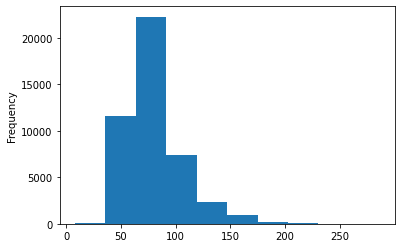

In [15]:
#plotting the frequency of characters on a histogram
import seaborn as sns

x = data['title'].apply(len).plot.hist()

In [16]:
from wordcloud import WordCloud, STOPWORDS

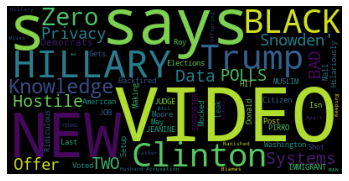

In [17]:
text = data[data["class"] == 1].values
wc = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [18]:
#Extracting numpy arrays for the title and classes
titles = data["title"].values
labels = data["class"].values

In [19]:
#Data Preprocessing


#Lowercase letters
data['title'] = data['title'].str.lower()
data.head()


#Ensure that all necessary punctuations are in one list
#Include ' and " as they are not default

import string
#Fix this (note to self)
punc = list(string.punctuation)
punc.append('\'')
punc.append('"')
print(punc)


#Loop through dataframe and remove all punctuations
def removePunc(text):
    for i in string.punctuation:
        text = text.replace(i, '')
    return text


# Apply to the DF series
data['title'] = data['title'].apply(removePunc)
data.head()


#Import nltk preprocessing library to convert text into a readable format
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize


#Tokenize the string (create a list -> each index is a word)
data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
data.head()

#Define text lemmatization model (eg: walks will be changed to walk)
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()


#Loop through title dataframe and lemmatize each word
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

#Apply to dataframe
data['title'] = data['title'].apply(lemma)

data.head()



#Define all stopwords in the English language (it, was, for, etc.)
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stopwords)
#Remove them from our dataframe
data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])





data.head()

C:\Users\astro\AppData\Local\Temp/ipykernel_11948/1705681334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].str.lower()
C:\Users\astro\AppData\Local\Temp/ipykernel_11948/1705681334.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(removePunc)


['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\astro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\astro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\astro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\astro\AppData\Local\Temp/ipykernel_11948/1705681334.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
C:\Users\astro\AppData\Local\Temp/ipykernel_11948/1705681334.py:54: SettingWithCopyWarning: 


<WordListCorpusReader in 'C:\\Users\\astro\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


C:\Users\astro\AppData\Local\Temp/ipykernel_11948/1705681334.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])


,title,class
15309,"[qatar, retools, boycott, top, auto, part, sup...",0
23447,"[‘, zero, knowledge, ’, system, hostile, data,...",1
12027,"[belgian, trial, paris, attack, suspect, postp...",0
6957,"[trump, nominate, retired, general, mattis, pe...",0
17660,"[two, new, poll, offer, bad, news, democrats…w...",1


In [20]:
from sklearn.model_selection import train_test_split

#Split data into training and testing dataset
#We teach our model based on the training set (including the labels)
#We take the labels away to test our model with the testing set
title_train, title_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=1000)

In [21]:
from gensim.models import Word2Vec
#Create a word2vec model
vec = Word2Vec(min_count=1)
#Build its vocabulary by looping through the title dataset
vec.build_vocab([x for x in title_train])
#Print the vocabular size
print(len(vec.wv.key_to_index))
#Train our word2vec model on all titles for 5 epochs
vec.train([x for x in title_train],total_examples=vec.corpus_count,epochs=5)

21264


(1617432, 1805630)

In [22]:
#For this project, we will use Tensorflow-hub words
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [23]:
#Convert each series of words to a word2vec embedding
indiv = []
for i in title_train:
    temp = np.array(embed(i))
    indiv.append(temp)

In [24]:
#Accounts for different length of words
import tensorflow as tf

indiv = tf.keras.preprocessing.sequence.pad_sequences(indiv,dtype='float')

In [25]:
# (35918 entries, maximum is 34 words, 250 is the vector size)
indiv.shape

(35918, 34, 250)

In [26]:
#Convert each of the testing data series to a Word2Vec embedding
test = []

for i in title_test:
  temp = np.array(embed(i))
  test.append(temp)
  

In [27]:
#Accounts for the different length of words in test data
test = tf.keras.preprocessing.sequence.pad_sequences(test,dtype='float')

In [28]:
#Sequential model has a 50 cell LSTM layer before Dense layers
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [29]:
#Compile model with binary_crossentropy loss, Adam optimizer, and accuracy metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])

In [50]:
epochs = 20
hist = model.fit(indiv, y_train,validation_data=[test,y_test],epochs=epochs)

Epoch 1/20
1123/1123 [==============================] - 44s 32ms/step - loss: 0.1491 - accuracy: 0.9407 - val_loss: 0.1685 - val_accuracy: 0.9345
Epoch 2/20
1123/1123 [==============================] - 17s 15ms/step - loss: 0.1469 - accuracy: 0.9412 - val_loss: 0.1648 - val_accuracy: 0.9344
Epoch 3/20
1123/1123 [==============================] - 19s 17ms/step - loss: 0.1447 - accuracy: 0.9428 - val_loss: 0.1649 - val_accuracy: 0.9351
Epoch 4/20
1123/1123 [==============================] - 18s 16ms/step - loss: 0.1426 - accuracy: 0.9440 - val_loss: 0.1616 - val_accuracy: 0.9365
Epoch 5/20
1123/1123 [==============================] - 18s 16ms/step - loss: 0.1419 - accuracy: 0.9437 - val_loss: 0.1740 - val_accuracy: 0.9306
Epoch 6/20
1123/1123 [==============================] - 17s 16ms/step - loss: 0.1396 - accuracy: 0.9457 - val_loss: 0.1711 - val_accuracy: 0.9313
Epoch 7/20
1123/1123 [==============================] - 17s 15ms/step - loss: 0.1370 - accuracy: 0.9467 - val_loss: 0.1755 -

In [51]:
hist_dict  = hist.history
acc = hist_dict['accuracy']
val_acc=hist_dict['val_accuracy']
loss = hist_dict['loss']
val_loss=hist_dict['val_loss']

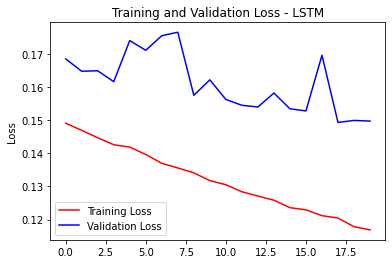

In [52]:
plt.subplot()
plt.plot(loss,'r',label='Training Loss')
plt.plot(val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss - LSTM')
plt.ylabel('Loss')
plt.legend()

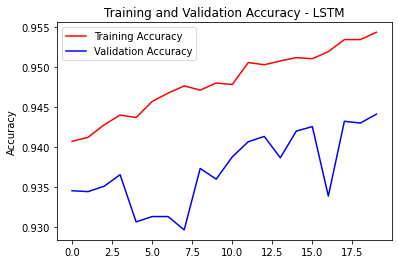

In [53]:
plt.subplot()
plt.plot(acc,'r',label='Training Accuracy')
plt.plot(val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy - LSTM')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#Test sample -> preprocess to extract word vectors
val = []

sample = np.array([['vaccines','do','not','work']])
for i in sample:
  temp = np.array(embed(i))
  val.append(temp)

In [ ]:
#Convert word vectors to a numpy array and run a prediction
val = np.array(val)
model.predict(val)

In [ ]:
from keras.models import load_model
model.save('lstm.h5')
model_final = load_model('lstm.h5')

In [ ]:
#Download with pickle
import pickle 

pickle.dump(model, open('lstm.pkl','wb'))
